# Regresión Lineal

Va enfocada linealmente para modelar la relación entre una variable dependiente a escalar y una o más variables explicativas.

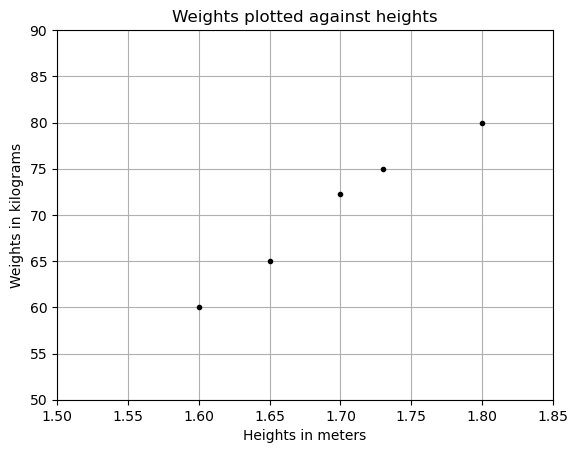

In [1]:
# Matplotlib inline

import matplotlib.pyplot as plt

# Representa la altura de un grupo de personas en metros

heights = [[1.6], [1.65], [1.7], [1.73], [1.8]]
# Representa el peso de un grupo de personas en Kilogramos
weights = [[60], [65], [72.3], [75], [80]]

plt.title("Weights plotted against heights")
plt.xlabel("Heights in meters")
plt.ylabel("Weights in kilograms")
plt.plot(heights, weights, "k.")

# Axis range for x and y
plt.axis([1.5, 1.85, 50, 90])
plt.grid(True)

Se observa que existe una correlación positiva entre los pesos y alturas de este grupo de personas. Si se dibujara una línea recta a través de los puntos y usarla para predecir el peso de otra persona en función de su altura.

## Uso de la clase Linear Regression para ajustar el modelo

In [3]:
from sklearn.linear_model import LinearRegression

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X = heights, y = weights)

LinearRegression()

**Consejo:** Observa que tanto la altura como el peso se representa como lista bidimensional. Esto se debe a que la función fit() requiere que los argumentos X e Y sean bidimensionales (de tipo lista o ndarray)

### Predicciones

In [6]:
# Crea la predicción

weight = model.predict([[1.75]])[0][0]
print(round(weight, 2))

76.04


Se deseó predecir el peso de una persona de 1.75 m de altura. Según el modelo, se predice un peso de 76.04 kg.

**CONSEJO:** En Scikit-learn, normalmente se utiliza la función fit() para entrenar un modelo. Una vez entrenado el modelo, se utiliza la función predict() par realizar una predicción.

### Trazando la línea de regresión lineal

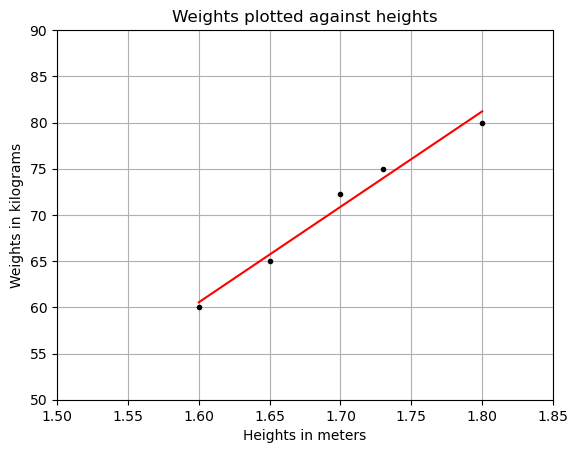

In [13]:
import matplotlib.pyplot as plt
heights = [[1.6], [1.65], [1.7], [1.73], [1.8]]
weights = [[60], [65], [72.3], [75], [80]]

plt.title("Weights plotted against heights")
plt.xlabel("Heights in meters")
plt.ylabel("Weights in kilograms")
plt.plot(heights, weights, "k.")
plt.axis([1.5, 1.85, 50, 90])
plt.grid(True)

# La regresión linean del gráfico
plt.plot(heights, model.predict(heights), "r")

## Obtención de la pendiente y la intersección de la recta de regresión linealb

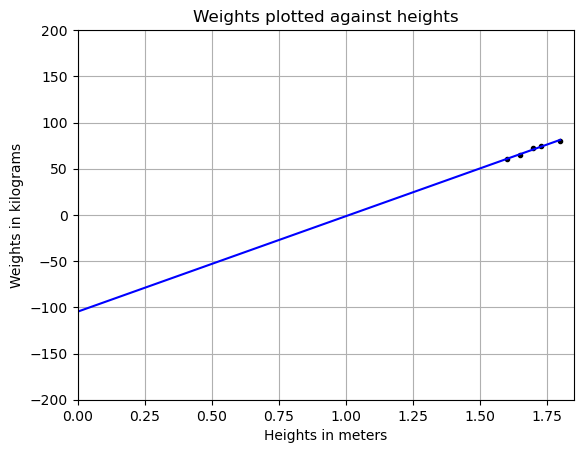

In [15]:
plt.title("Weights plotted against heights")
plt.xlabel("Heights in meters")
plt.ylabel("Weights in kilograms")
plt.plot(heights, weights, "k.")
plt.axis([0, 1.85, -200, 200])
plt.grid(True)

# La regresión lineal del gráfico
extreme_heights = [[0], [1.8]]
plt.plot(extreme_heights, model.predict(extreme_heights), "b")

In [16]:
# Si bien se puede obtener la intersección con el eje y prediciendo el peso si la altura es 0:
round(model.predict([[0]])[0][0],2)

np.float64(-104.75)

In [17]:
# El objeto modelo proporciona la respuesta directamente a través de la propiedad intercept_:
print(round(model.intercept_[0],2))

-104.75


In [18]:
# Usando el objeto modelo, también se puede obtener la pendiente de la línea de regresión lineal a través de la propiedad coef_:
print(round(model.coef_[0][0],2))

103.31


## Examen del rendimiento del modelo mediante el cálculo de la suma de cuadrados residuales

In [23]:
# Calculando la RSS
import numpy as np
print(f"Suma de cuadrados residuales {np.sum((weights - model.predict(heights)) ** 2)}")

Suma de cuadrados residuales 5.336432246998307


## Evaluación del modelo con un conjunto de datos de prueba

In [24]:
# Test data
heights_test = [[1.58], [1.62], [1.69], [1.76], [1.82]]
weights_test = [[58], [63], [72], [73], [85]]

In [25]:
# Total Sum of Squares (TSS)
weights_test_mean = np.mean(np.ravel(weights_test))
TSS = np.sum((np.ravel(weights_test) - weights_test_mean) ** 2)
print(f"TSS: {TSS}")

TSS: 430.79999999999995


In [27]:
# Residual Sum of Squares (RSS)
RSS = np.sum((np.ravel(weights_test) - np.ravel(model.predict(heights_test))) ** 2)
print(f"RSS: {RSS}")

RSS: 24.616218471324437


In [28]:
# R_Squared

R_squared = 1 - (RSS / TSS)
print(f"R-squared: {R_squared}")

R-squared: 0.9428592885995254


**CONSEJO:** La función ravel() convierte la lista bidimensional en un array contiguo aplanado (unidimensional)

In [29]:
# Scikit-learn cuenta con la función Score() para calcular el R-cuadrado automáticamente

# Using scikit-learn to calculate r-squared
print(f"R-squared: {model.score(heights_test, weights_test)}")

R-squared: 0.9428592885995254


Un valor de R-cuadrado de 0.9429 (95.29%) indica un ajuste bastante bueno para tus datos de prueba.

## Persistencia del modelo

In [37]:
import pickle

# Save the model to disk
filename = "../models/pract-regresion-lineal/HeightsAndWeights_model.sav"

# Write to the file using write and binary mode
pickle.dump(model, open(filename, "wb"))

In [38]:
# Cargar el modelo desde el archivo
# Load the model from disk
loaded_model = pickle.load(open(filename, "rb"))

# Ahora se puede utilizar el modelo
result = loaded_model.score(heights_test, weights_test)
print(result)

0.9428592885995254


Usar el módulo joblib es muy similar

In [40]:
from joblib import dump, load

import joblib

# Save the model to disk
filename = "../models/pract-regresion-lineal/HeightsAndWeights_model2.sav"
dump(model, filename)

#load the model from disk
loaded_model = load(filename)
result = loaded_model.score(heights_test, weights_test)
print(result)

filename = "../models/pract-regresion-lineal/HeightsAndWeights_model2.sav"
joblib.dump(model, filename)
# Load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(heights_test, weights_test)
print(result)

0.9428592885995254
0.9428592885995254
